In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')
import numpy as np
import string

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import plotly.io as plt_io
from plotly.subplots import make_subplots
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

plt_io.templates["custom_dark"] = plt_io.templates["plotly_dark"]
plt_io.templates["custom_dark"]['layout']['paper_bgcolor'] = '#30404D'
plt_io.templates["custom_dark"]['layout']['plot_bgcolor'] = '#30404D'
plt_io.templates['custom_dark']['layout']['yaxis']['gridcolor'] = '#4f687d'
plt_io.templates['custom_dark']['layout']['xaxis']['gridcolor'] = '#4f687d'

In [2]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>

Summary of the dataset from Kaggle:

#### Context

This data is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first

#### Content

The dataset comprises of Consumer Complaints on Financial products and we’ll see how to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, Other financial service, Prepaid card. Also we will try to identify the companies from the dataset

Variable info: https://cfpb.github.io/api/ccdb/fields.html

In [3]:
df = pd.read_csv('data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
def prettify_column_name(col):
    punctuation_stripped = col.translate(str.maketrans('', '', string.punctuation))
    col__ = punctuation_stripped.replace(' ', '_')
    return col__.lower()

df.columns = [prettify_column_name(i) for i in df.columns]

# Missing values of each column

In [5]:
def missing_value(df=df):
    total = df.isnull().sum()
    pct = df.isnull().sum() * 100 / df.shape[0]
    missing = pd.concat([total, round(pct, 1)], axis=1, keys=['Total', 'Percentage'])
    return missing.sort_values(by='Percentage', ascending=False)

missing_value()

Total  Percentage
tags                          575868        85.9
consumer_complaint_narrative  555894        82.9
company_public_response       525401        78.3
consumer_consent_provided     462447        69.0
subissue                      400730        59.8
subproduct                    198202        29.6
consumer_disputed              41419         6.2
zip_code                        5324         0.8
state                           5305         0.8
date_sent_to_company               0         0.0
timely_response                    0         0.0
company_response_to_consumer       0         0.0
date_received                      0         0.0
submitted_via                      0         0.0
product                            0         0.0
company                            0         0.0
issue                              0         0.0
complaint_id                       0         0.0

# Total unique values of each column

In [6]:
def total_unique_values(df=df):
    cols = pd.Series(df.columns.values)
    len_unique = pd.Series([len(df[i].unique()) for i in df.columns.values])
    unique = pd.concat([cols, len_unique], axis=1, keys=['Column', 'Total Unique Values'])
    return unique.sort_values(by='Total Unique Values', ascending=False)

total_unique_values()

Column  Total Unique Values
17                  complaint_id               670598
5   consumer_complaint_narrative               112691
9                       zip_code                27890
7                        company                 3933
0                  date_received                 1818
13          date_sent_to_company                 1767
3                          issue                   95
4                       subissue                   69
8                          state                   63
2                     subproduct                   48
1                        product                   12
6        company_public_response                   11
14  company_response_to_consumer                    8
12                 submitted_via                    6
11     consumer_consent_provided                    5
10                          tags                    4
16             consumer_disputed                    3
15               timely_response                    2

# Unique values of columns with 10 smallest unique values

In [7]:
unique = total_unique_values()

for product in unique['Column'].iloc[10:]:
    print(f"""Unique values for {product.upper()}: 
    {df[product].unique()}
    """)

Unique values for PRODUCT: 
    ['Consumer Loan' 'Bank account or service' 'Mortgage' 'Debt collection'
 'Credit card' 'Credit reporting' 'Student loan' 'Money transfers'
 'Payday loan' 'Other financial service' 'Prepaid card' 'Virtual currency']
    
Unique values for COMPANY_PUBLIC_RESPONSE: 
    [nan 'Company chooses not to provide a public response'
 'Company believes it acted appropriately as authorized by contract or law'
 'Company has responded to the consumer and the CFPB and chooses not to provide a public response'
 "Company can't verify or dispute the facts in the complaint"
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company'
 'Company disputes the facts presented in the complaint'
 'Company believes complaint represents an opportunity for improvement to better serve consumers'
 'Company believes the complaint is the result of a misunderstanding'
 'Company believes complaint is the result of an isolated e

# Sub-products of each product

In [8]:
# let's see the subproducts for each product

for product in df['product'].unique():
    a = df.loc[df['product'] == product]
    print(f"""Subproducts of {product.upper()}:
    {a['subproduct'].unique()}
    """)

Subproducts of CONSUMER LOAN:
    ['Vehicle loan' 'Vehicle lease' 'Installment loan'
 'Personal line of credit' 'Title loan' 'Pawn loan']
    
Subproducts of BANK ACCOUNT OR SERVICE:
    ['Checking account' 'Other bank product/service'
 '(CD) Certificate of deposit' 'Savings account'
 'Cashing a check without an account']
    
Subproducts of MORTGAGE:
    ['Conventional fixed mortgage' 'Other mortgage'
 'Conventional adjustable mortgage (ARM)' 'FHA mortgage'
 'Home equity loan or line of credit' 'Reverse mortgage' 'VA mortgage'
 'Second mortgage']
    
Subproducts of DEBT COLLECTION:
    ['Other (i.e. phone, health club, etc.)' 'I do not know' 'Credit card'
 'Federal student loan' 'Mortgage' 'Auto' 'Medical'
 'Non-federal student loan' 'Payday loan']
    
Subproducts of CREDIT CARD:
    [nan]
    
Subproducts of CREDIT REPORTING:
    [nan]
    
Subproducts of STUDENT LOAN:
    ['Non-federal student loan' 'Federal student loan servicing']
    
Subproducts of MONEY TRANSFERS:
    ['Domes

# Aggregate analysis

Text(0.5, 1.0, 'Percentage of complaints per company (Top 50)')

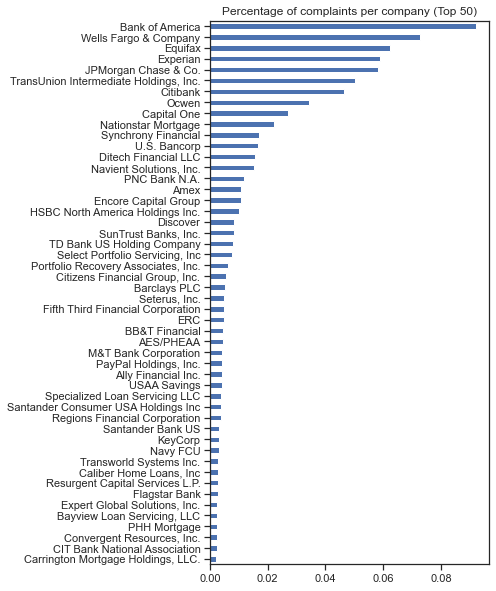

In [9]:
# Total complaints per company (percentage)


fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df['company'].value_counts(normalize=True).sort_values(ascending=True)[-50:].plot(ax=ax, kind='barh')
ax.set_title('Percentage of complaints per company (Top 50)')

Nothing surprising, and not many to infer other than that big companies have significantly more complaints. This number should be normalized by accounting for the companies' number of customers or their market cap.

In [10]:
def plot_frequency(col, dimension=(10, 5)):
    fig_dims = dimension
    fig, ax = plt.subplots(figsize=fig_dims)
    df[col].value_counts(normalize=True).sort_values(ascending=True).apply(lambda x: x*100).plot(ax=ax, kind='bar', grid=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Percentage of {col.replace('_', ' ')}")

def plot_frequency_h(col, dimension=(5,5)):
    fig_dims = dimension
    fig, ax = plt.subplots(figsize=fig_dims)
    df[col].value_counts(normalize=True).sort_values(ascending=True).apply(lambda x: x*100).plot(ax=ax, kind='barh', grid=True)
    ax.set_title(f"Percentage of {col.replace('_', ' ')}")
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

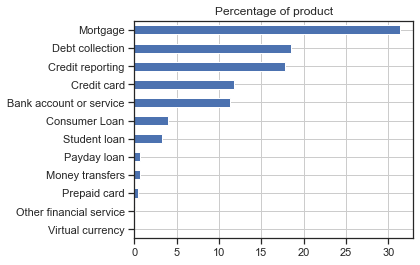

In [11]:
# Total complaints per product (percentage)

plot_frequency_h('product', (5, 4))

Mortgages, debt collection, credit reporting, credit card, and bank account/service dominate the complaints.

In [12]:
states = sorted([str(i) for i in df['state'].unique()])
top_n = 10

for i in states:
    top10 = df.loc[df['state'] == i]['company'].value_counts()[:top_n].index
    print('Top 10 company in ', i, ':\n\n', list(top10), '\n')


Top 10 company in  AA :

 ['Wells Fargo & Company', 'Capital One', 'PHH Mortgage', 'Discover', 'AES/PHEAA', 'BNY Mellon', 'NELSON AND KENNARD', 'Fifth Third Financial Corporation', 'Citibank', 'KeyCorp'] 

Top 10 company in  AE :

 ['Bank of America', 'Experian', 'Equifax', 'JPMorgan Chase & Co.', 'Wells Fargo & Company', 'Ocwen', 'TransUnion Intermediate Holdings, Inc.', 'USAA Savings', 'Citibank', 'Capital One'] 

Top 10 company in  AK :

 ['Wells Fargo & Company', 'Bank of America', 'Experian', 'Equifax', 'TransUnion Intermediate Holdings, Inc.', 'JPMorgan Chase & Co.', 'Citibank', 'Capital One', 'Ocwen', 'U.S. Bancorp'] 

Top 10 company in  AL :

 ['Equifax', 'Wells Fargo & Company', 'TransUnion Intermediate Holdings, Inc.', 'Experian', 'Bank of America', 'Regions Financial Corporation', 'JPMorgan Chase & Co.', 'Citibank', 'Ditech Financial LLC', 'Ocwen'] 

Top 10 company in  AP :

 ['Bank of America', 'Equifax', 'Experian', 'Wells Fargo & Company', 'Navy FCU', 'Encore Capital Grou

Top 10 company in  NH :

 ['Bank of America', 'JPMorgan Chase & Co.', 'Wells Fargo & Company', 'Citizens Financial Group, Inc.', 'Citibank', 'Experian', 'Equifax', 'Ocwen', 'TransUnion Intermediate Holdings, Inc.', 'TD Bank US Holding Company'] 

Top 10 company in  NJ :

 ['Wells Fargo & Company', 'Bank of America', 'JPMorgan Chase & Co.', 'Citibank', 'Equifax', 'Experian', 'Ocwen', 'TransUnion Intermediate Holdings, Inc.', 'TD Bank US Holding Company', 'Capital One'] 

Top 10 company in  NM :

 ['Experian', 'Equifax', 'Wells Fargo & Company', 'Bank of America', 'TransUnion Intermediate Holdings, Inc.', 'Citibank', 'JPMorgan Chase & Co.', 'Ocwen', 'Capital One', 'U.S. Bancorp'] 

Top 10 company in  NV :

 ['Bank of America', 'Wells Fargo & Company', 'Experian', 'Equifax', 'TransUnion Intermediate Holdings, Inc.', 'JPMorgan Chase & Co.', 'Citibank', 'Ocwen', 'U.S. Bancorp', 'Nationstar Mortgage'] 

Top 10 company in  NY :

 ['JPMorgan Chase & Co.', 'Bank of America', 'Citibank', 'Experi

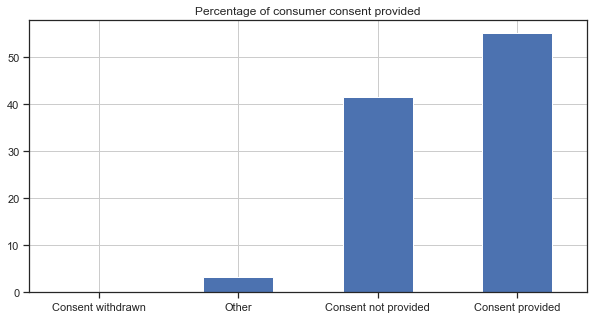

In [13]:
plot_frequency('consumer_consent_provided')

We can see that a lot of consumers (slightly more than half of them) provided consent to let CFPB release their complaint narrative. Complaint narratives are really good source of data that provided details of each complaint. We can deduce so many meaningful things from them, e.g. recurring issue or subissue for a company or an industry, where in the process of a service a problem is likely to occur, how a company treats their customer in handling the complaints, etc.

If there is anything to infer from this graph, it's that the CFPB should try to push for more complaint narratives. Almost half of the consumers didn't consent to their stories being released, so there must be a common reason (probably fear of privacy breach) behind their actions, and CFPB should strive to assure this population that their complaints would go a long way to serve other consumers if they choose to provide their narratives.

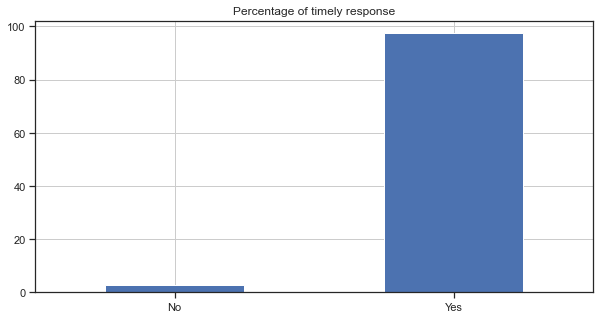

In [14]:
plot_frequency('timely_response')

This aggregate analysis doesn't really tell us anything. The reason is companies who take complaints seriously and have really low consumer dispute rate will probably still behave like that in the future and so will companies with the opposite value. Consumer dispute rate is an important metric of how companies handle unsatisfied customers and we can infer more by looking at dispute rate of a particular company/companies.

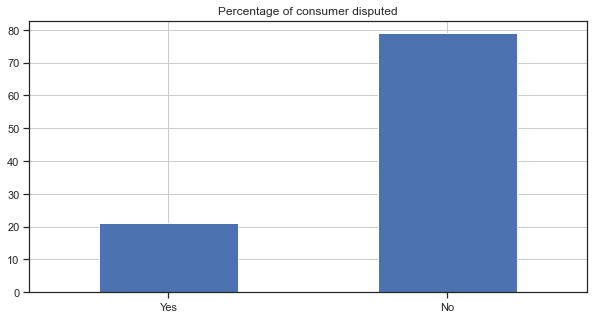

In [15]:
plot_frequency('consumer_disputed')

Same as above: aggregate analysis is not the way to go for this one.

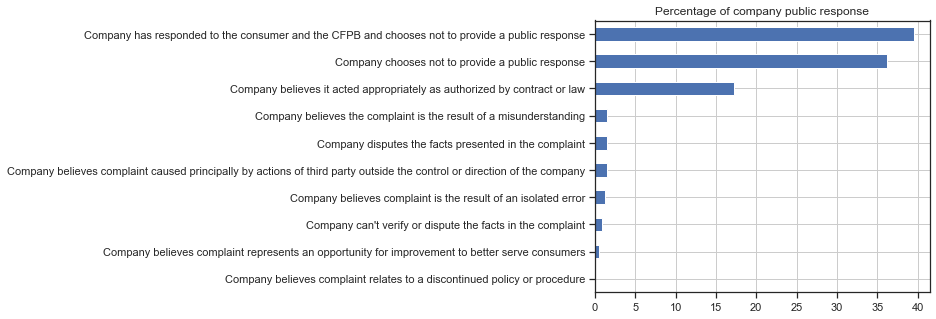

In [16]:
plot_frequency_h('company_public_response', (6, 5))

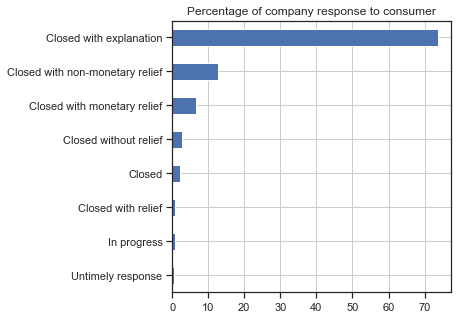

In [17]:
plot_frequency_h('company_response_to_consumer')

In [18]:
def plot_treemap_state(var, title='', filt=None):
    
    tmp = df.copy()
    if filt is not None:
        if filt is not None:
            col = list(filt.keys())[0]
            value = filt[list(filt.keys())[0]]
            if isinstance(value,
                      list):
                tmp = tmp.loc[tmp[col].isin(value)]
            else:
                tmp = tmp.loc[tmp.col == value]
    
    grp = tmp.groupby(['state'] + var).size().to_frame(name='count').reset_index()
    
    fig = px.treemap(grp,
                    path=['state'] + var,
                    color=var[-1],
                    values='count',
                    color_discrete_map={'(?)': '#679b9b'},
                    color_discrete_sequence=px.colors.qualitative.Set3)
    
    fig.layout.update(title=title, template='custom_dark')
    
    return fig

In [19]:
plot_treemap_state(['product', 'subproduct'], 'Product and subproduct by State')

In [20]:
plot_treemap_state(['product', 'issue'], 'Product and issue by State')

In [21]:
plot_treemap_state(['consumer_disputed'], 'Consumer Dispute Rate by State')

In [22]:
df['consumer_disputed_'] = df['consumer_disputed'].apply(lambda x: True if x=='Yes' else False)
grp = df.groupby(['company'])
cd_avg = grp['consumer_disputed_'].mean()  #cd for consumer dispute

### See which companies have dispute rates above 80%

In [23]:
def dispute_rate_above_n_percent(pct):
    filt = cd_avg.loc[cd_avg.values >= pct/100]
    print(f"Percentage of company with {pct}% or above consumer dispute rate: {len(filt) * 100/len(df['company'].unique())}")
    print(f"Number of companies with {pct}% or above consumer dispute rate: {len(filt)}")
    companies = [i for i in filt.index]
    return companies, filt

companies, filt = dispute_rate_above_n_percent(80)
filt

Percentage of company with 80% or above consumer dispute rate: 3.4833460462751082
Number of companies with 80% or above consumer dispute rate: 137


company
1st Capital Mortgage, LLC                  1.0
1st Maryland Mortgage Corporation          1.0
1st Priority Mortgage, Inc.                1.0
A.L. Babbs and Associates, LLC             1.0
ABA Recovery Service, Inc.                 1.0
                                          ... 
Veristone Mortgage, LLC                    1.0
Vonda J. Dunn, P.C.                        1.0
Wetherington Hamilton, P.A.                1.0
Zenith Financial Mortgage Company, Inc.    1.0
Zions First National Bank                  1.0
Name: consumer_disputed_, Length: 137, dtype: float64

### See which companies have dispute rates below 5%

In [24]:
def dispute_rate_below_n_percent(pct):
    filt = cd_avg.loc[cd_avg.values <= pct/100]
    print(f"Percentage of company with {pct}% or below consumer dispute rate: {len(filt) * 100/len(df['company'].unique())}")
    print(f"Number of companies with {pct}% or below consumer dispute rate: {len(filt)}")
    companies = [i for i in filt.index]
    return companies, filt

companies, filt = dispute_rate_below_n_percent(5)
filt

Percentage of company with 5% or below consumer dispute rate: 41.469616069158405
Number of companies with 5% or below consumer dispute rate: 1631


company
(Former)Shapiro, Swertfeger & Hasty, LLP       0.0
1st 2nd Mortgage Company Of NJ, Inc.           0.0
1st Capital Finance of South Carolina, Inc.    0.0
1st Fidelity Loan Servicing                    0.0
1st Portfolio Holding Corporation              0.0
                                              ... 
Zingo Cash Illinois LLC                        0.0
Zip Capital Group, LLC                         0.0
i3 Lending, Inc                                0.0
iFreedom Direct Corporation                    0.0
iQuantified Management Services, LLC           0.0
Name: consumer_disputed_, Length: 1631, dtype: float64

### See which companies have the highest 20% dispute rate

In [25]:
def highest_dispute_rate(pct):
    nth = np.percentile(cd_avg.values, 100-pct)
    print(f'{100-pct}th percentile of dispute rate: {nth}')
    return cd_avg.loc[cd_avg.values >= nth].sort_values(ascending=True)

highest_dispute_rate(20)

80th percentile of dispute rate: 0.2857142857142857


company
iServe Trust                                     0.285714
Century Credit & Collections, LLC                0.285714
Medical-Dental-Hospital Bureau of San Antonio    0.285714
Collection Bureau of Walla Walla                 0.285714
The Wilber Law Firm, P.C.                        0.285714
                                                   ...   
Bakalar & Associates, P. A.                      1.000000
Phelan Hallinan & Jones, LLC                     1.000000
Pono Ventures Inc.                               1.000000
American 1st Rate Mortgage, LLC                  1.000000
1st Capital Mortgage, LLC                        1.000000
Name: consumer_disputed_, Length: 818, dtype: float64

### See which companies have the lowest 20% dispute rate

In [26]:
def lowest_dispute_rate(pct):
    nth = np.percentile(cd_avg.values, pct)
    print(f'{pct}th percentile of dispute rate: {nth}')
    return cd_avg.loc[cd_avg.values <= nth].sort_values()

lowest_dispute_rate(50)

50th percentile of dispute rate: 0.125


company
(Former)Shapiro, Swertfeger & Hasty, LLP      0.000
Mortgage Master Service Corp                  0.000
Mortgage Master Inc                           0.000
Mortgage Lender Services, Inc.                0.000
Mortgage Express, LLC                         0.000
                                              ...  
Golden State Collections LLC                  0.125
United Pacific Mortgage                       0.125
LANIER COLLECTIONS AGENCY AND SERVICES INC    0.125
Fedloan Help                                  0.125
Signature Bank (NY)                           0.125
Name: consumer_disputed_, Length: 1998, dtype: float64

### See which companies have the 100% timely response rate

In [27]:
df['timely_response_'] = df['timely_response'].apply(lambda x: True if x=='Yes' else False)
grp2 = df.groupby(['company'])
tr_avg = grp2['timely_response_'].mean() #tr for timely response
filt = tr_avg.loc[tr_avg.values == 1]
print(f"Percentage of company with 100% timely response rate: {len(filt) * 100/len(df['company'].unique())}")
filt

Percentage of company with 100% timely response rate: 39.86778540554284


company
1st 2nd Mortgage Company Of NJ, Inc.           1.0
1st Capital Finance of South Carolina, Inc.    1.0
1st Capital Mortgage, LLC                      1.0
1st Maryland Mortgage Corporation              1.0
1st Midwest Mortgage Corp                      1.0
                                              ... 
Zwicker & Associates                           1.0
eMoneyUSA Holdings, LLC                        1.0
iFreedom Direct Corporation                    1.0
iServe Trust                                   1.0
reekside Recovery And Capital Management       1.0
Name: timely_response_, Length: 1568, dtype: float64

### See which companies have 0% timely response rate

In [28]:
filt = tr_avg.loc[tr_avg.values == 0]
print(f"Percentage of company with 0% timely response rate: {len(filt) * 100/len(df['company'].unique())}")
filt

Percentage of company with 0% timely response rate: 12.026442918891432


company
(Former)Shapiro, Swertfeger & Hasty, LLP             0.0
99th Floor LLC                                       0.0
A & O Recovery Solutions, LLC                        0.0
A.R.C. Accounts Recovery (U.S.A.) Corporation LLC    0.0
AAA COLLECTORS, INC.                                 0.0
                                                    ... 
Zeidman’s Jewelry & Loan of Michigan                 0.0
Zeus Mortgage, Ltd.                                  0.0
Zingo Cash Illinois LLC                              0.0
eCon Credit LP                                       0.0
i3 Lending, Inc                                      0.0
Name: timely_response_, Length: 473, dtype: float64

### See which companies have timely response rate above 90%

In [29]:
def timely_response_above_n_percent(pct):
    filt = tr_avg.loc[tr_avg.values >= pct/100].sort_values(ascending=True)
    print(f"Percentage of company with {pct}% or above timely response rate: {len(filt) * 100/len(df['company'].unique())}")
    print(f"Number of companies with {pct}% or above timely response rate: {len(filt)}")
    companies = [i for i in filt.index]
    return companies, filt

companies, filt = timely_response_above_n_percent(90)
filt

Percentage of company with 90% or above timely response rate: 55.47927790490719
Number of companies with 90% or above timely response rate: 2182


company
Filings and Claims Inc.                     0.9
American First Finance, Inc.                0.9
Student Assist Plus LLC                     0.9
American Credit Bureau, Inc.                0.9
American Credit Adjusters                   0.9
                                           ... 
Flat Branch Mortgage, Inc.                  1.0
Flagstar Bank                               1.0
Fix Media                                   1.0
FirstLine Financial, Inc.                   1.0
reekside Recovery And Capital Management    1.0
Name: timely_response_, Length: 2182, dtype: float64

### See which companies have timely response rate below 20%

In [30]:
def timely_response_below_n_percent(pct):
    filt = tr_avg.loc[tr_avg.values <= pct/100].sort_values(ascending=True)
    print(f"Percentage of company with {pct}% or below timely response rate: {len(filt) * 100/len(df['company'].unique())}")
    print(f"Number of companies with {pct}% or below timely response rate: {len(filt)}")
    companies = [i for i in filt.index]
    return companies, filt

companies, filt = timely_response_below_n_percent(20)
filt

Percentage of company with 20% or below timely response rate: 13.882532418001526
Number of companies with 20% or below timely response rate: 546


company
(Former)Shapiro, Swertfeger & Hasty, LLP     0.0
Nations Holding Company                      0.0
National Recovery Service, Inc.              0.0
National Processing Group LLC                0.0
National Medical Administrators, Inc         0.0
                                            ... 
National Management Recovery Corp. (NMRC)    0.2
FirsTrust Mortgage, Inc.                     0.2
Nationwide Doc Prep Inc                      0.2
Greenback Recovery Group, LLC                0.2
Lake Area Collections, LLC                   0.2
Name: timely_response_, Length: 546, dtype: float64

### See which companies have the highest 20% timely response rate

In [31]:
def highest_timely_response(pct):
    nth = np.percentile(tr_avg.values, 100-pct)
    print(f'{100-pct}th percentile of timely response rate: {nth}')
    return tr_avg.loc[tr_avg.values >= nth].sort_values(ascending=True)
   
highest_timely_response(20)

80th percentile of timely response rate: 1.0


company
1st 2nd Mortgage Company Of NJ, Inc.                            1.0
Nexcheck, LLC                                                   1.0
Newman, Mathis, Brady & Spedale                                 1.0
New York State Higher Education Services Corporation (HESC)—    1.0
New Southern Loans, Inc                                         1.0
                                                               ... 
Equinox Financial Management Solutions, Inc.                    1.0
Endpoint Resolution Services (ERS)                              1.0
Encircle Collections, Inc.                                      1.0
Empire Home Mortgage, Inc                                       1.0
reekside Recovery And Capital Management                        1.0
Name: timely_response_, Length: 1568, dtype: float64

### See which companies have the lowest 20% timely response rate

In [32]:
def lowest_timely_response(pct):
    nth = np.percentile(tr_avg.values, pct)
    print(f'{pct}th percentile of timely response rate: {nth}')
    return tr_avg.loc[tr_avg.values <= nth].sort_values()

lowest_timely_response(20)

20th percentile of timely response rate: 0.5


company
(Former)Shapiro, Swertfeger & Hasty, LLP    0.0
Leon Financial Services                     0.0
Levy Diamond Bello & Associates, LLC        0.0
Liberty Capital Services LLC                0.0
Liberty Loan Co inc.                        0.0
                                           ... 
Paramount Capital Group, Inc.               0.5
Qualey Law Group, Inc.                      0.5
Alpine Capital Investments, LLC             0.5
National Account Services Group, LLC.       0.5
Money Now- Hattiesburg, Inc.                0.5
Name: timely_response_, Length: 1011, dtype: float64

### See if there are common companies in both the list of lowest timely response rate and highest dispute rate

In [33]:
cd1, cd2 = dispute_rate_above_n_percent(90) #these are filled with 100% dispute rate companies
tr1, tr2 = timely_response_below_n_percent(20)

cd_set = set(cd1)
intersection = list(cd_set.intersection(tr1))
intersection

Percentage of company with 90% or above consumer dispute rate: 3.4833460462751082
Number of companies with 90% or above consumer dispute rate: 137
Percentage of company with 20% or below timely response rate: 13.882532418001526
Number of companies with 20% or below timely response rate: 546


['ABA Recovery Service, Inc.',
 'The CKB Firm, P.C.',
 'SEB Legal, LLC',
 'American 1st Rate Mortgage, LLC',
 'Tsarouhis Law Group, LLC',
 'Alavi Law, PLLC',
 'Delmar Financial Company',
 'Cross State Motors, LLC',
 'Veristone Mortgage, LLC',
 'Kingston Data & Credit International Inc.',
 'Sibcy Cline Mortgage Services, Inc.',
 'Law Offices of Snyder & Associates, LLC',
 'E Mortgage',
 'J Martinez Investments LLC',
 'Integras Capital Recovery LLC',
 'Celentano, Stadtmauer & Walentowicz, LLP']

These 16 companies have both the lowest timely response rate and the highest dispute rate.

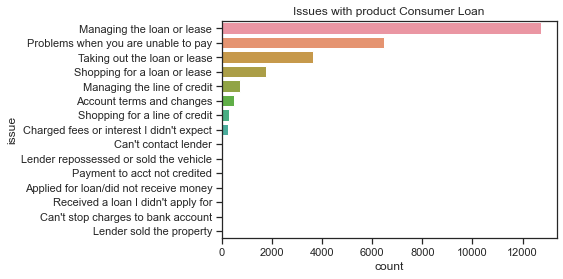

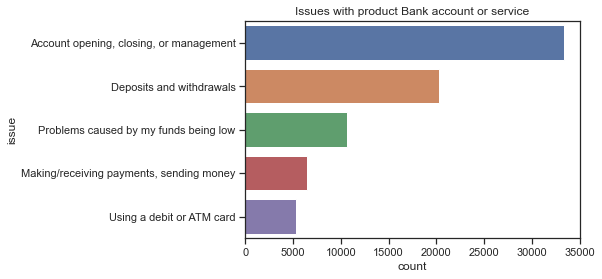

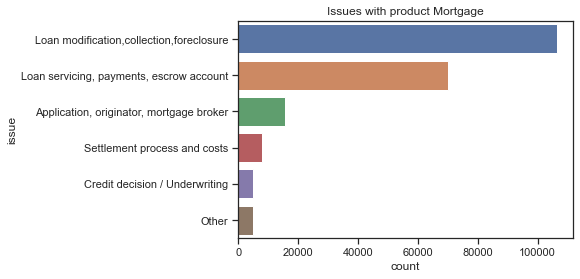

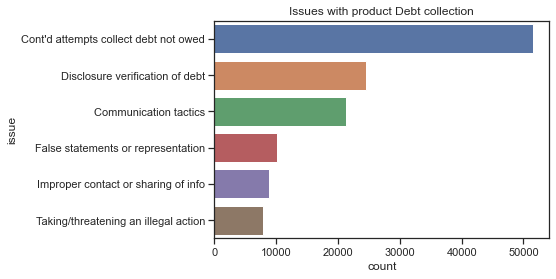

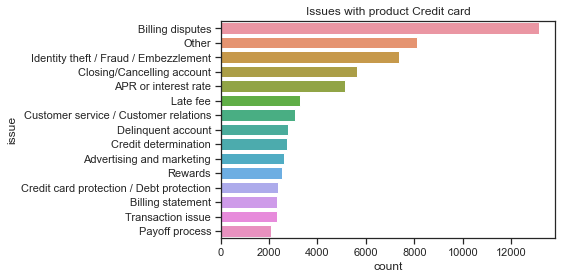

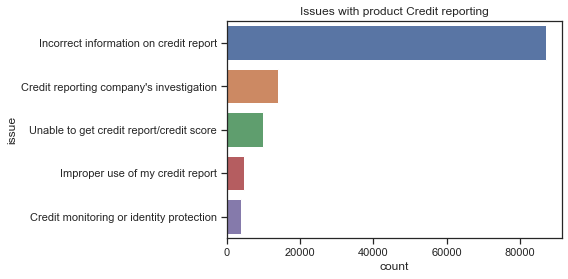

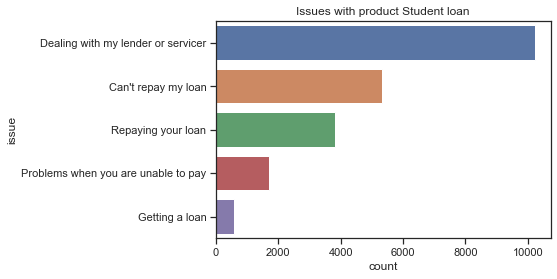

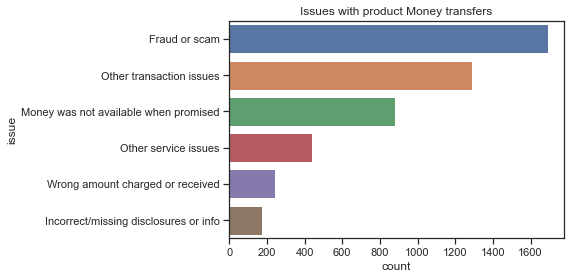

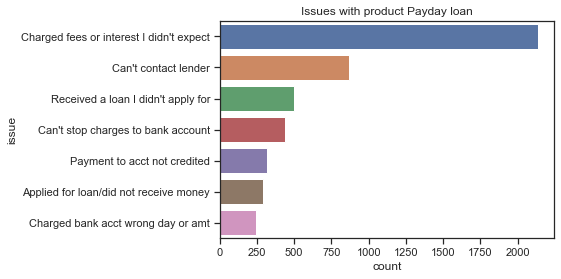

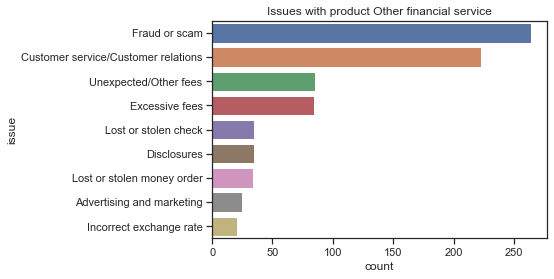

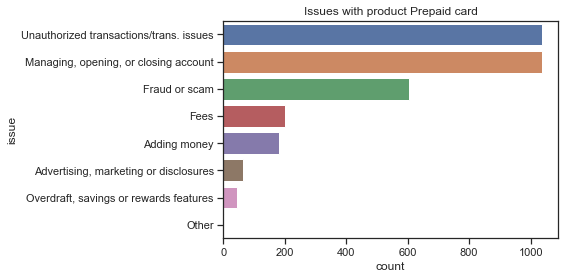

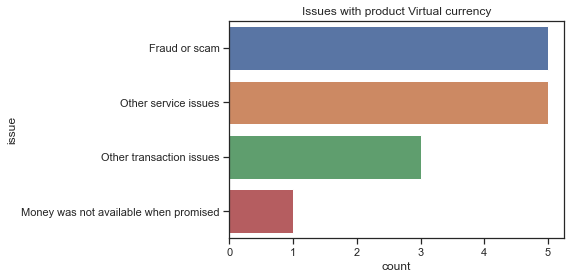

In [34]:
def plot_issues_per_product(product, df=df, top_n_issues=15):
    filt = df.loc[df['product'] == product]
    g = sns.countplot(y='issue', data=filt, order=filt['issue'].value_counts().iloc[0:top_n_issues].index)
    g.set_title(f'Issues with product {product}')
    return g

products = df['product'].unique()
for i in products:
    plot_issues_per_product(i)
    plt.show()

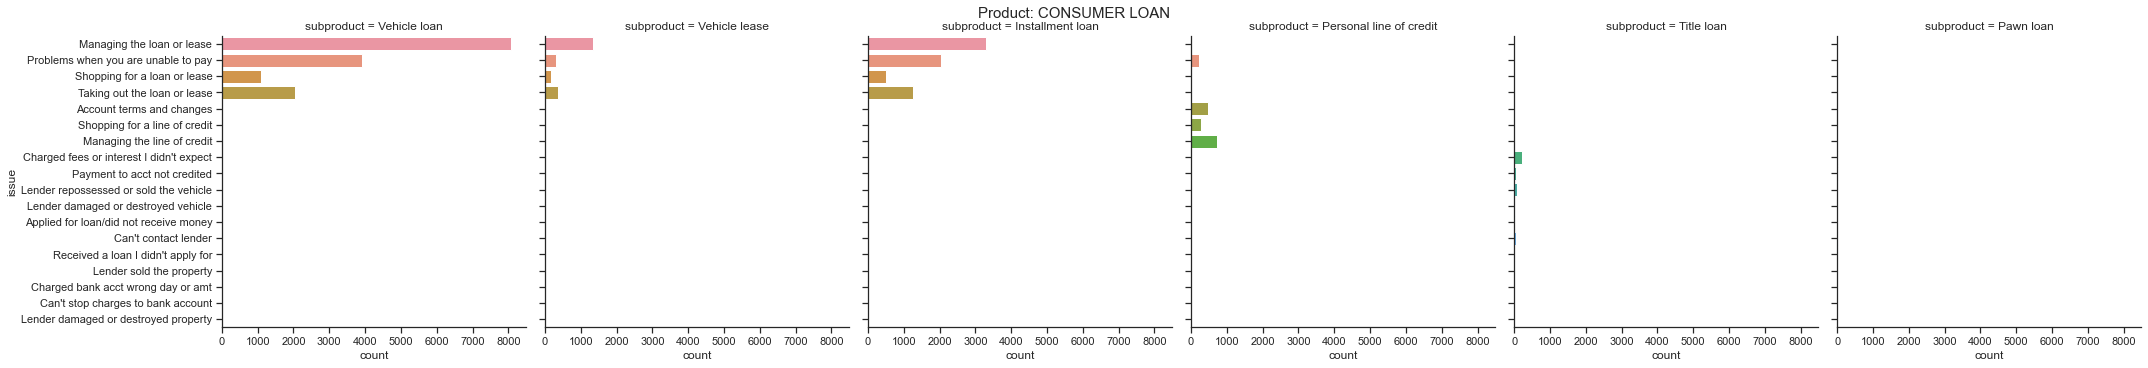

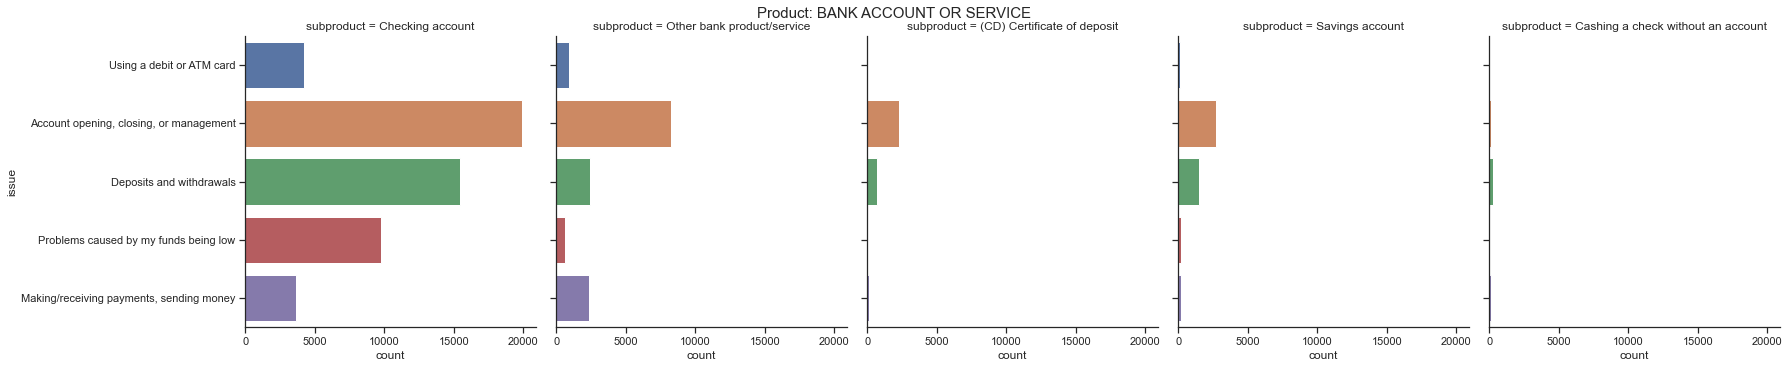

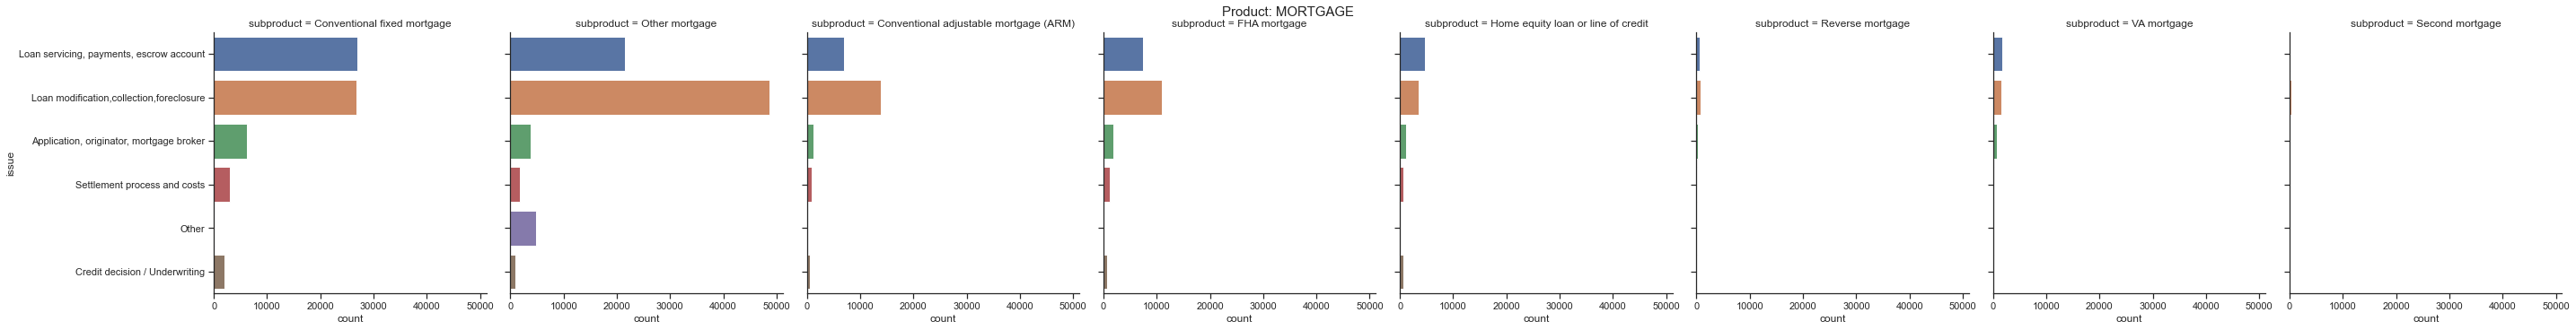

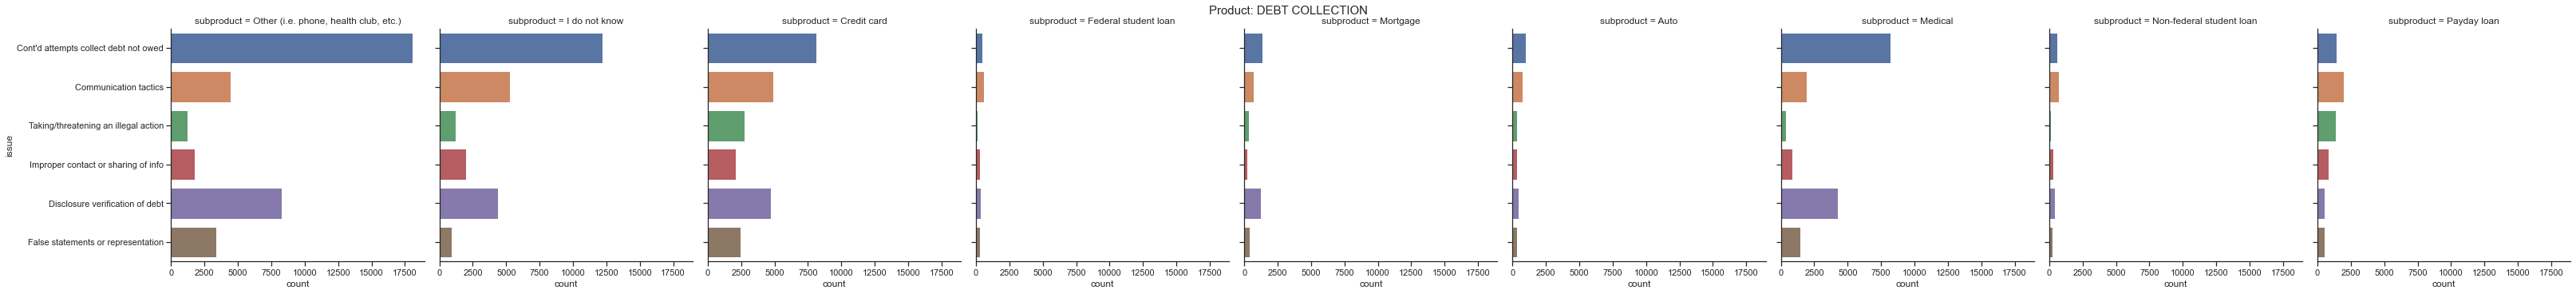

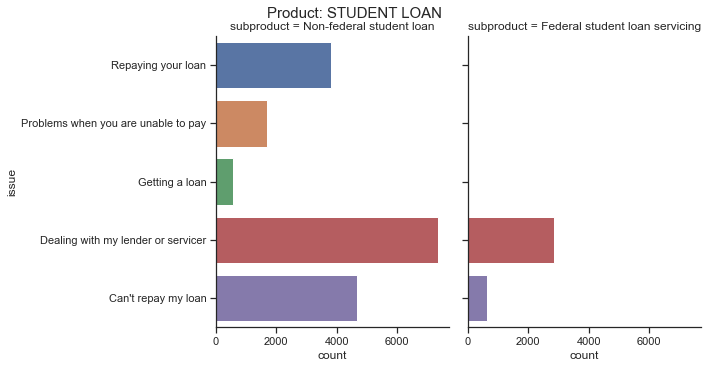

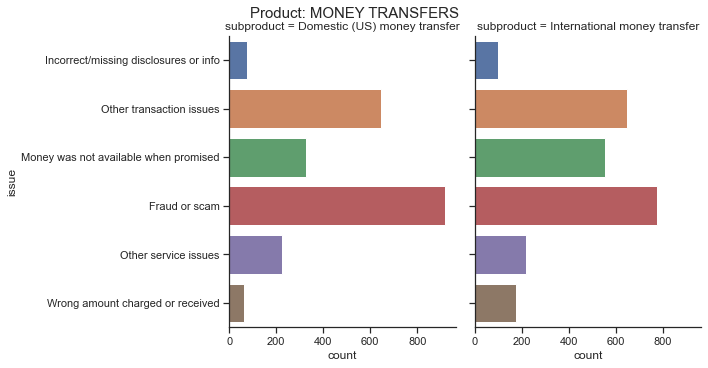

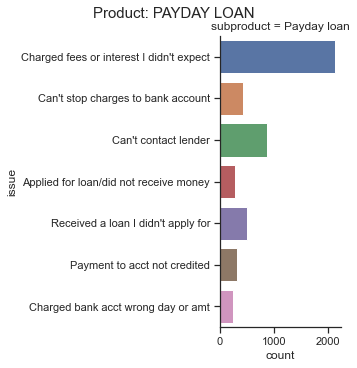

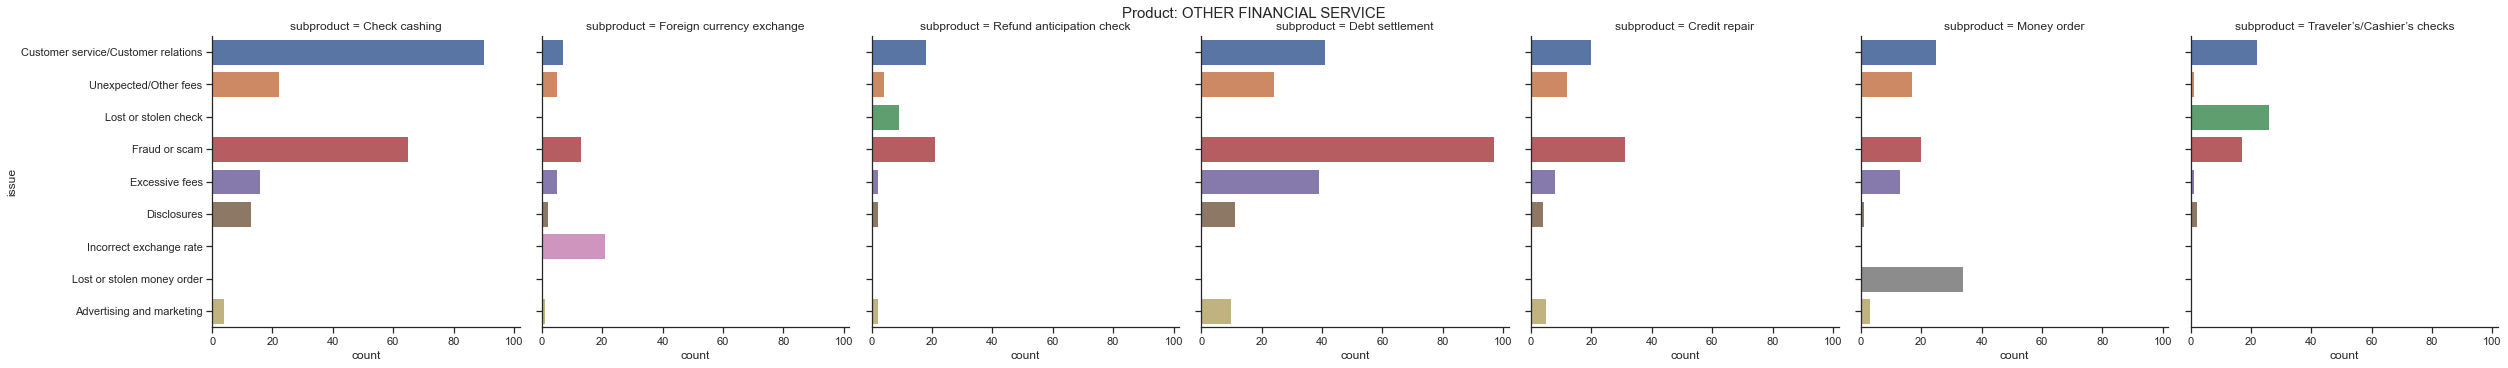

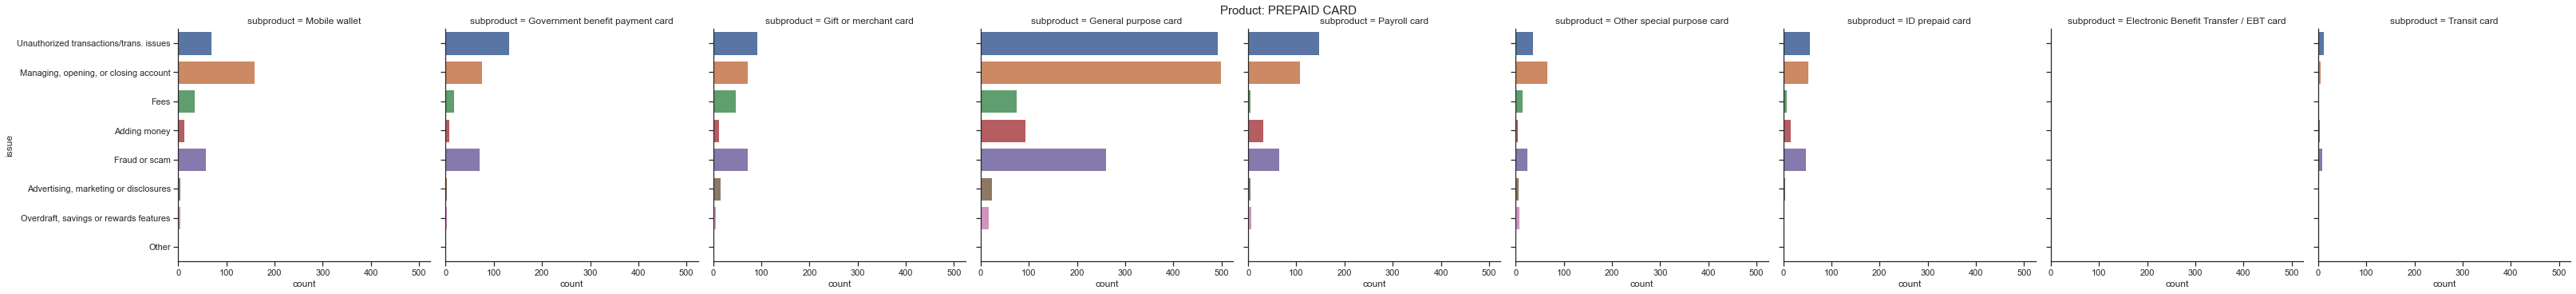

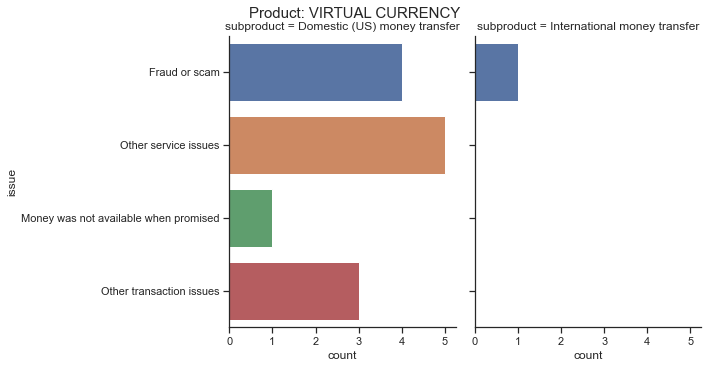

In [35]:
# Issues per subproduct

filt = df.loc[df['subproduct'].notnull(), ['product', 'issue', 'subproduct']]

for product in filt['product'].unique():
    filt2 = filt.loc[df['product'] == product]
    g = sns.catplot(y='issue', col='subproduct', data=filt2, kind='count')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Product: {product.upper()}', fontsize=15)
    plt.show()

## Per-company analysis

### The 'plot_company' function returns all meaningful general metrics for a specified company

In the example below, I plotted the metrics for Bank of America.

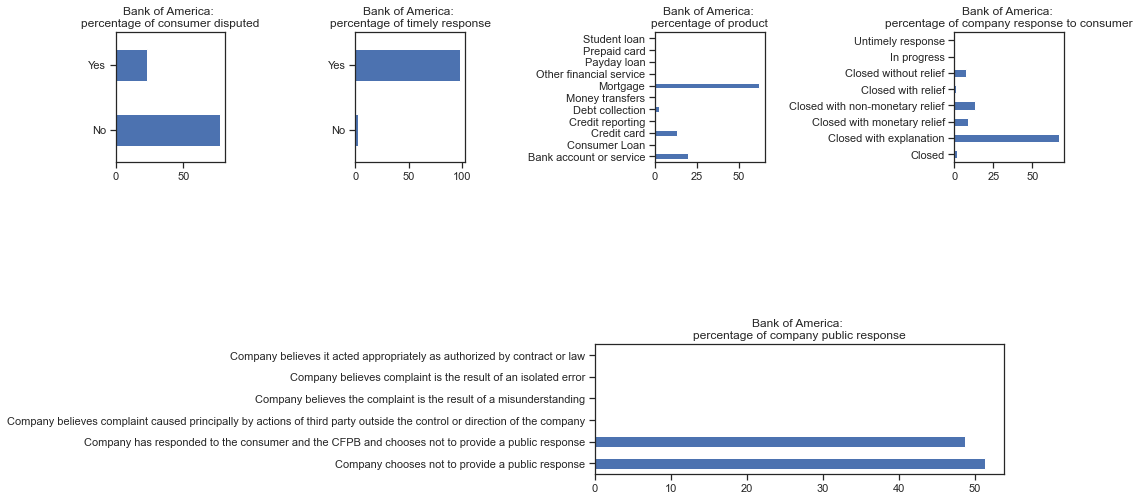

In [36]:
def plot_company(company, add_height=0):
    tmp = df.copy()
    grid = plt.GridSpec(2, 4)
    cols = [
        'consumer_disputed', 'timely_response', 'product',
        'company_response_to_consumer', 'company_public_response'
    ]

    for i, j in zip([0, 4, 9, 14], cols[0:-1]):
        fig = tmp.loc[tmp['company'] == company][j].value_counts(
            normalize=True).sort_index().apply(lambda x: x * 100).plot(
                title=f"{company}: \npercentage of {j.replace('_', ' ')}",
                kind='barh',
                ax=plt.subplot2grid((4, 16), (0, i), colspan=2),
                figsize=(17, 10))
    fig2 = tmp.loc[tmp['company'] == company][cols[-1]].value_counts(
        normalize=True).apply(lambda x: x * 100).plot(
            title=f"{company}: \npercentage of {cols[-1].replace('_', ' ')}",
            kind='barh',
            ax=plt.subplot2grid((4, 16), (2, 8), colspan=7, rowspan=1),
            figsize=(17, 11))


plot_company('Bank of America', 2)

In [37]:
# Utility functions to plot issues of a company's product

def get_column_unique_values(company, col):
    list_ = [i for i in df.loc[df['company'] == company][col].unique()]
    return list_

def plot_product_issues(company, product, add_height=0):
    title = f'{company}: \nPercentage of issues regarding {product}'
    fig, ax = plt.subplots(figsize=(5, 5+add_height))
    df.loc[(df['company'] == company) & (df['product'] == product)]['issue'].value_counts(normalize=True).apply(lambda x:  x*100).plot(kind='barh', ax=ax,title=title)

In [38]:
# You can use the first function to get all products of a company and then plot issues regarding that product

company='Bank of America'

get_column_unique_values(company, 'product')

['Bank account or service',
 'Mortgage',
 'Credit card',
 'Debt collection',
 'Money transfers',
 'Consumer Loan',
 'Student loan',
 'Credit reporting',
 'Prepaid card',
 'Other financial service',
 'Payday loan']

### The plot_product_issues' returns all issues related to a certain product for a specified company

In the example below, I plotted all the issues for Bank of America's credit card products.

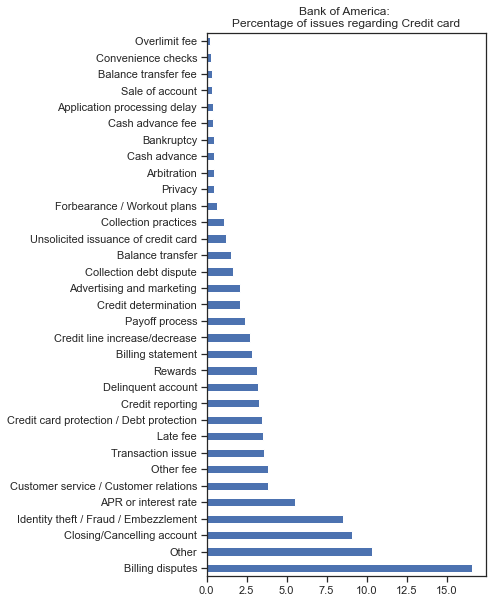

In [39]:
# And you decide you want to see issues related with BoA's credit cards.

plot_product_issues('Bank of America', 'Credit card', 5)